In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def predict(x, w, b):
  return sigmoid(np.matmul(w.T, x) + b)

def predict_bool(x, w, b):
  return predict([x], w, b) >= 0.5

def model(x, y, learning_rate, iter):
  n, m = x.shape

  w = np.zeros((m, 1))
  b = 0

  y_row = y.T
  xt = x.T

  for i in range(iter):
    y_pred = predict(xt, w, b)
    y_diff = y_pred - y_row
    deriv_w = (1 / m) * np.matmul(y_diff, x)
    deriv_b = (1 / m) * np.sum(y_diff)
    w = w - learning_rate * deriv_w.T
    b = b - learning_rate * deriv_b

  return w, b

In [3]:
x_data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
y_data = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]

x = np.array(x_data).reshape((-1, 1))
y = np.array(y_data).reshape((-1, 1))

In [4]:
w, b = model(x, y, 0.001, 100000)
print(w.shape)
print(w, b)

(1, 1)
[[1.47025763]] -18.284180300632038


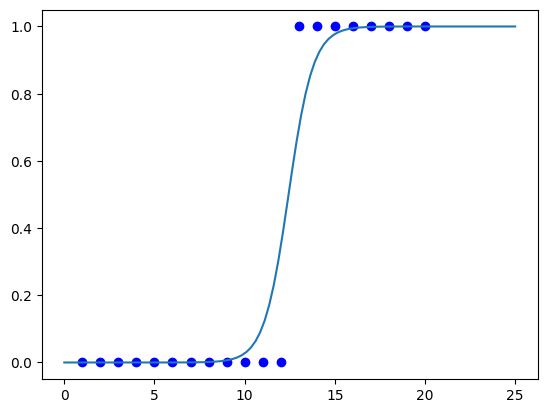

In [5]:
plt.scatter(x, y, color='blue')

x_val = np.linspace(0, 25, 100)
fn = lambda x: predict([x], w, b)

plt.plot(x_val, np.vectorize(fn)(x_val))

In [22]:
assert(predict_bool(20, w, b))
assert(predict_bool(25, w, b))
assert(predict_bool(100, w, b))
assert(predict_bool(70, w, b))
assert(not predict_bool(12, w, b))
assert(not predict_bool(6, w, b))
assert(not predict_bool(3, w, b))
assert(not predict_bool(1, w, b))
assert(not predict_bool(0, w, b))